# OpenSAFELY COVID Vaccine coverage report

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is our regular weekly report on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).

In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)

suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Vaccinations included up to **{latest_date_fmt}** inclusive"))

### Report last updated **06 Apr 2021**

### Vaccinations included up to **30 Mar 2021** inclusive

#### 
## Contents:
- **<a href=#summary>Overview</a>**
- **<a href=#summarychart>Summary Chart</a>**
- **Trends in vaccination coverage** according to demographic/clinical features, for:
 - <a href=#charts80>80+ population</a>
 - <a href=#charts70>70-79 population</a>
 - <a href=#charts_shield>shielding (aged 16-69) population</a>
 - <a href=#charts65>65-69 population</a>
 - <a href=#charts60>60-64 population</a>
 - <a href=#charts55>55-59 population</a>
- **<a href=#tables>Current vaccination coverage of each eligible population group, according to demographic/clinical features</a>**<br />
  - Includes each of the groups above, plus care home (65+) and LD (aged 16-64) populations.
- Appendix: <a href=#ethnicity>Proportion of each population group for whom ethnicity is known</a>

# 
## Overview of Vaccination Figures to date <a name='summary' />

In [2]:
import json
summary_stats_1 = json.load(open(os.path.join("..", "interim-outputs","text", "summary_stats_first_dose.txt")))
summary_stats_2 = json.load(open(os.path.join("..", "interim-outputs","text", "summary_stats_second_dose.txt")))


for x in summary_stats_1.keys():
    if "population receiving first dose" in x:
        x2 = x.replace("first", "second")
        display(Markdown(f"{x}: {summary_stats_1[x]}; second dose: {summary_stats_2[x2]}"))
    else:
        if "Moderna" not in x:    
            display(Markdown(f"{x}: {summary_stats_1[x]}"))
    
    
display(Markdown(f"##### \n" 
                 "**NB** Patient counts are rounded to nearest 7\n"
                "##### \n" ))

display(Markdown(f"### Group definitions \n - The **care home** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).\n"
                 "\n- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) \
                 provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).\n"                
                "\n- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)\
                codelist and excludes people who are shielding.\n"
                 "\n- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding \
                is only counted in the shielding group, not in the 65-69 population\n"))

### As at 30 Mar 2021: 

**Total** population receiving first dose in TPP: 19,999; second dose: 4,998

**80+** population receiving first dose: 854 (**40.1%** of 2,121); second dose: 217 (**10.1%** of 2,121)

**70-79** population receiving first dose: 1,414 (**39.5%** of 3,570); second dose: 343 (**9.6%** of 3,570)

**care home** population receiving first dose: 546 (**40.0%** of 1,372); second dose: 147 (**10.6%** of 1,372)

**shielding (aged 16-69)** population receiving first dose: 154 (**37.0%** of 413); second dose: 42 (**10.2%** of 413)

**65-69** population receiving first dose: 903 (**41.1%** of 2,191); second dose: 210 (**9.6%** of 2,191)

**LD (aged 16-64)** population receiving first dose: 322 (**41.3%** of 784); second dose: 84 (**10.3%** of 784)

**60-64** population receiving first dose: 1,043 (**39.7%** of 2,632); second dose: 294 (**11.2%** of 2,632)

**55-59** population receiving first dose: 1,302 (**41.5%** of 3,136); second dose: 315 (**10.0%** of 3,136)

**under 55s, not in other eligible groups shown** population receiving first dose: 13,468; second dose: 3,353

#### Vaccine types and second doses: 

Second doses (% of all vaccinated): 4,998 (25.0%)

Oxford-AZ vaccines (% of all first doses): 0 (0.0%)

##### 
**NB** Patient counts are rounded to nearest 7
##### 


### Group definitions 
 - The **care home** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).

- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/)                  provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).

- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)                codelist and excludes people who are shielding.

- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding                 is only counted in the shielding group, not in the 65-69 population


# 

## Summary Chart <a name='summarychart' />

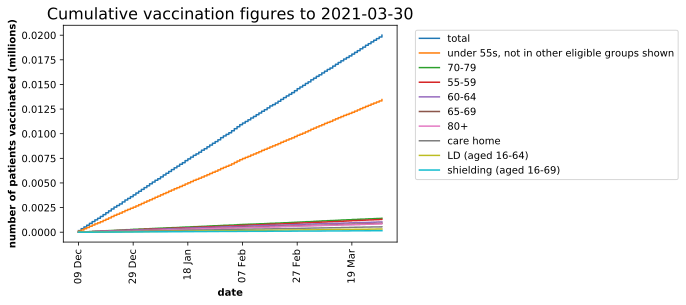

In [3]:
import sys
sys.path.append('../lib/')
from create_report import *

show_chart(filepath="Cumulative vaccination figures.svg", title="off")

## Trends in vaccination rates of 80+ population according to demographic/clinical features, cumulatively by day. <a name='charts80' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 80+ population

### COVID vaccinations among 80+ population
 ### by Sex

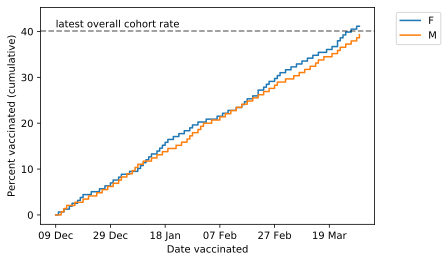

### COVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

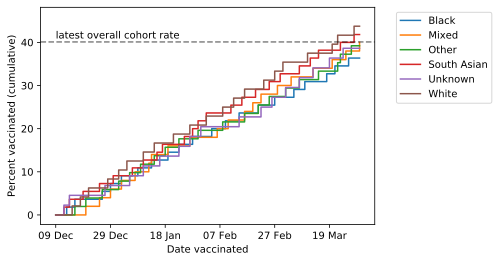

### COVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

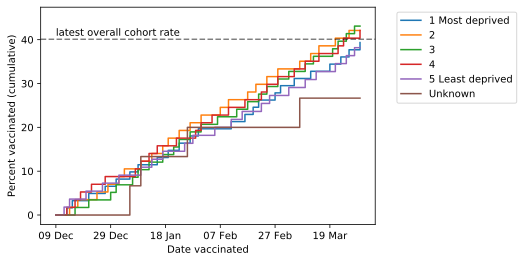

### COVID vaccinations among 80+ population
 ### by BMI

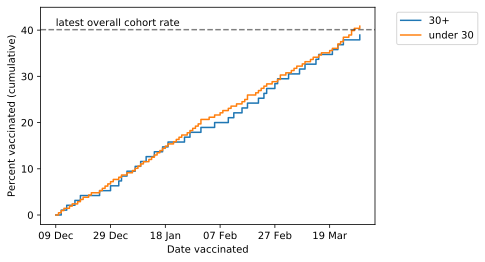

### COVID vaccinations among 80+ population
 ### by Chronic cardiac disease

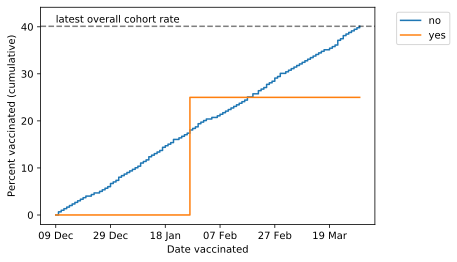

### COVID vaccinations among 80+ population
 ### by Current COPD

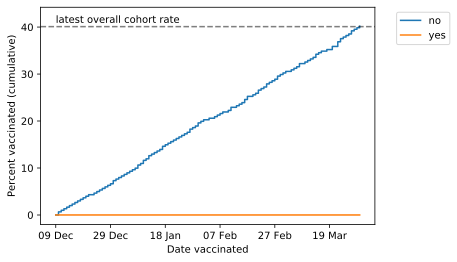

### COVID vaccinations among 80+ population
 ### by Dialysis

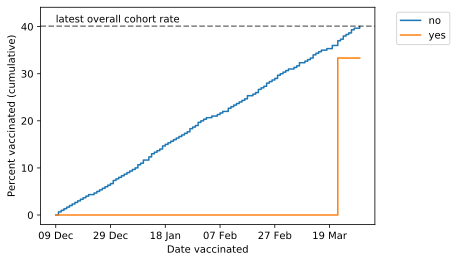

### COVID vaccinations among 80+ population
 ### by Dementia

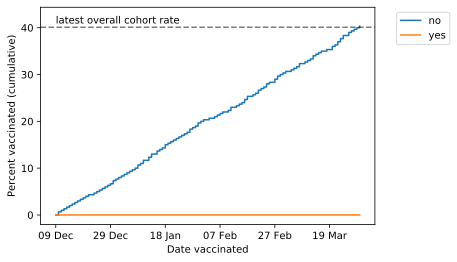

### COVID vaccinations among 80+ population
 ### by Learning disability

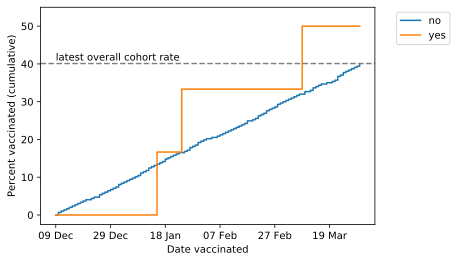

### COVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

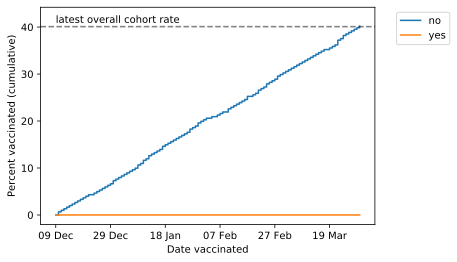

### COVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

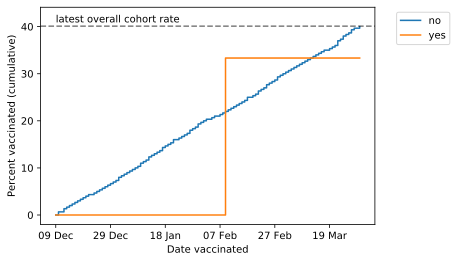

### COVID vaccinations among 80+ population
 ### by 2nd dose

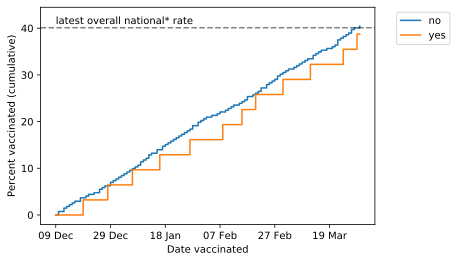

### COVID vaccinations among 80+ population
 ### by Age band

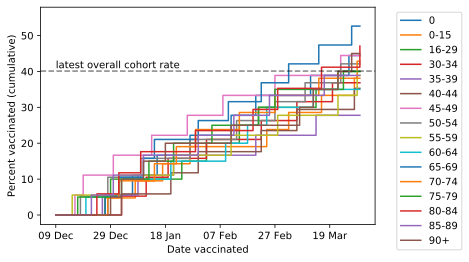

In [4]:
chartlist = find_and_sort_filenames(foldername="figures",
                                        files_to_exclude=["Cumulative vaccination figures.svg"])
   
display(Markdown("## 80+ population"))
for item in chartlist:
    show_chart(item)


## Trends in vaccination rates of 70-79 population according to demographic/clinical features, cumulatively by day. <a name='charts70' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 70-79 population

### COVID vaccinations among 70-79 population
 ### by Sex

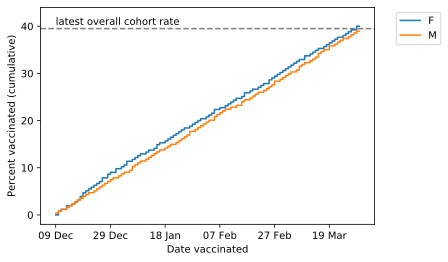

### COVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

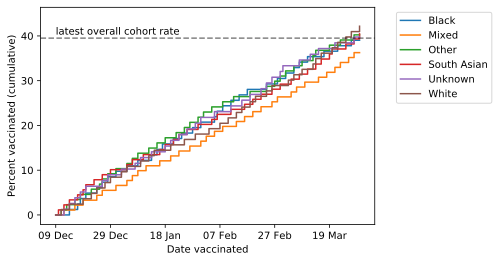

### COVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

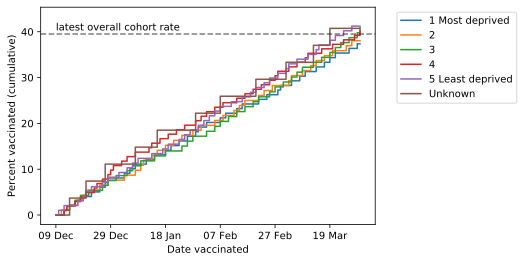

### COVID vaccinations among 70-79 population
 ### by BMI

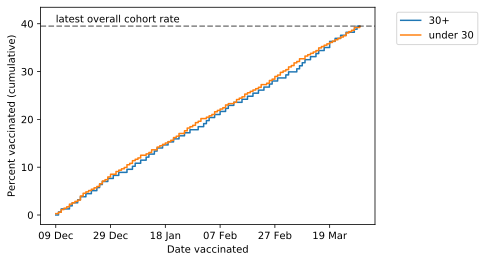

### COVID vaccinations among 70-79 population
 ### by Chronic cardiac disease

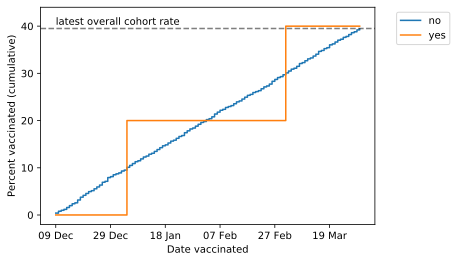

### COVID vaccinations among 70-79 population
 ### by Current COPD

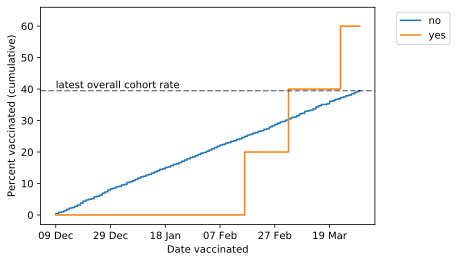

### COVID vaccinations among 70-79 population
 ### by Dialysis

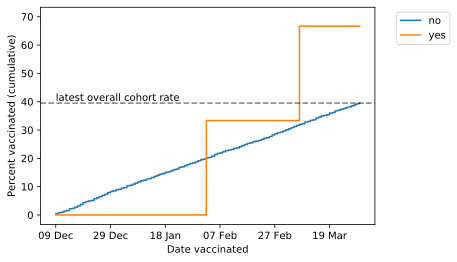

### COVID vaccinations among 70-79 population
 ### by Dementia

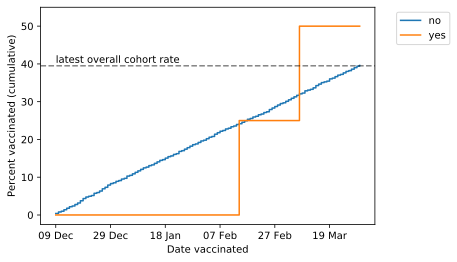

### COVID vaccinations among 70-79 population
 ### by Learning disability

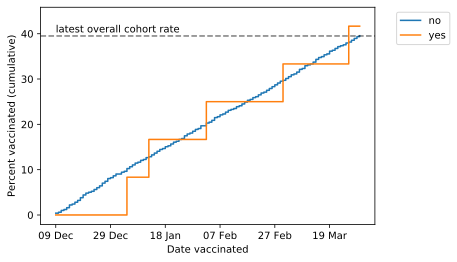

### COVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

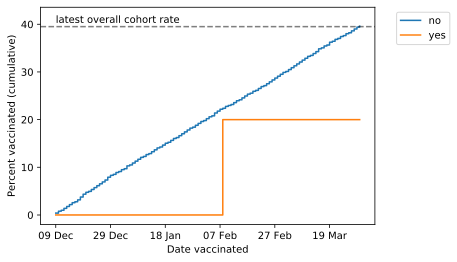

### COVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

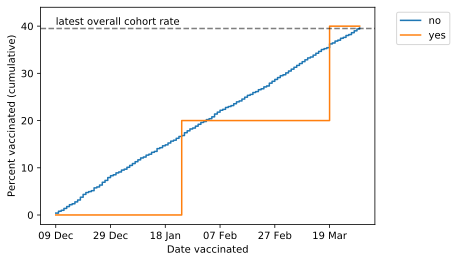

### COVID vaccinations among 70-79 population
 ### by 2nd dose

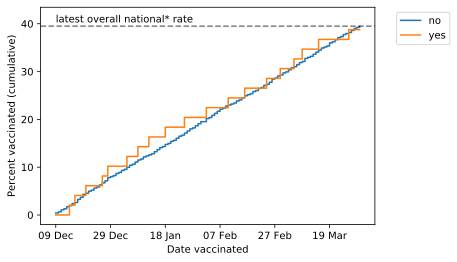

### COVID vaccinations among 70-79 population
 ### by Age band

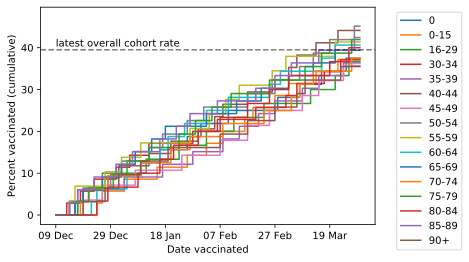

In [5]:
    
display(Markdown("## 70-79 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="70-79",
                                        files_to_exclude=["Cumulative vaccination figures.svg"])
    
for item in chartlist2:
    show_chart(item)    

## 
## Trends in vaccination rates of **shielding** population according to demographic/clinical features, cumulatively by day. <a name='charts_shield' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## Shielding population (aged 16-69)

### COVID vaccinations among shielding (aged 16-69) population
 ### by newly shielded since feb 15

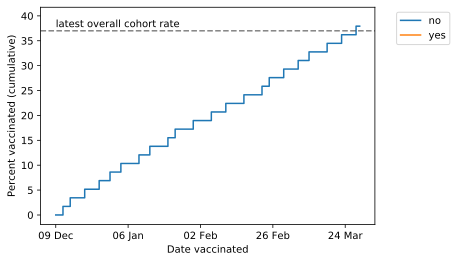

### COVID vaccinations among shielding (aged 16-69) population
 ### by Age band

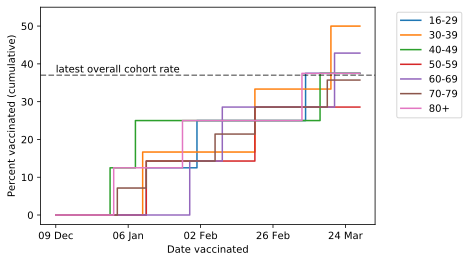

### COVID vaccinations among shielding (aged 16-69) population
 ### by Sex

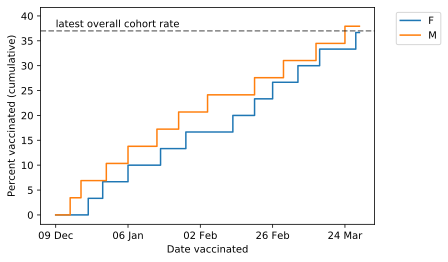

### COVID vaccinations among shielding (aged 16-69) population
 ### by Ethnicity (broad categories)

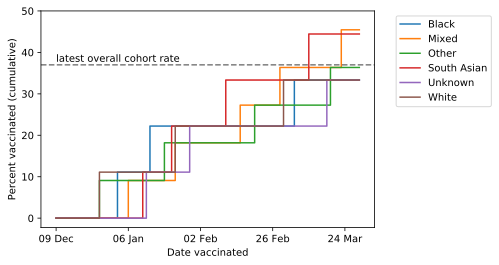

### COVID vaccinations among shielding (aged 16-69) population
 ### by Index of Multiple Deprivation (quintiles)

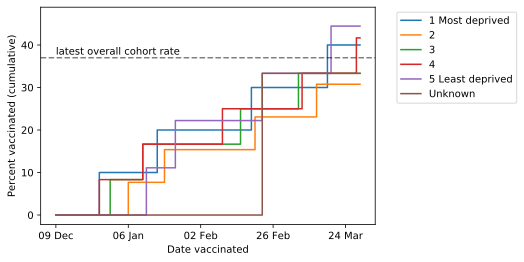

### COVID vaccinations among shielding (aged 16-69) population
 ### by Learning disability

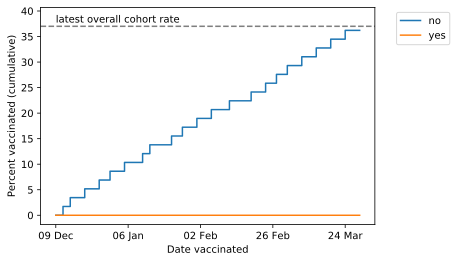

In [6]:
    
display(Markdown("## Shielding population (aged 16-69)"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="shielding (aged 16-69)",
                                        files_to_exclude=["Cumulative vaccination figures.svg"])
    
for item in chartlist2:
    show_chart(item)    

## 
## Trends in vaccination rates of 65-69 population according to demographic/clinical features, cumulatively by day. <a name='charts65' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 65-69 population

### COVID vaccinations among 65-69 population
 ### by Sex

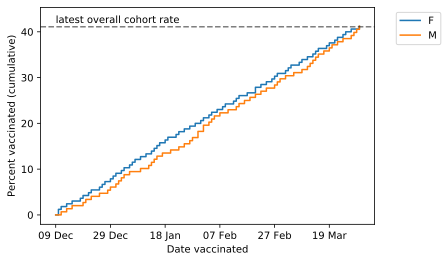

### COVID vaccinations among 65-69 population
 ### by Ethnicity (broad categories)

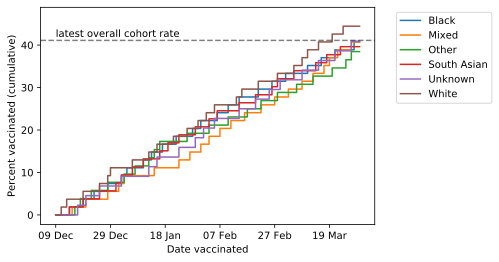

### COVID vaccinations among 65-69 population
 ### by Index of Multiple Deprivation (quintiles)

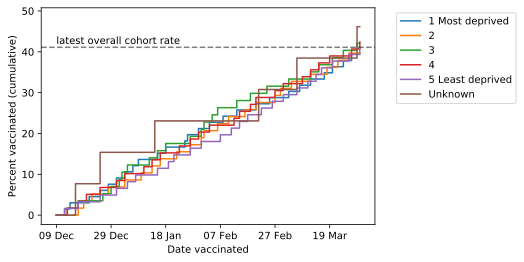

### COVID vaccinations among 65-69 population
 ### by BMI

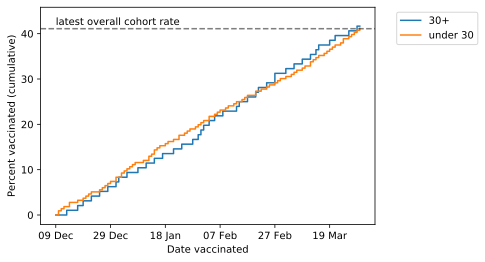

### COVID vaccinations among 65-69 population
 ### by Chronic cardiac disease

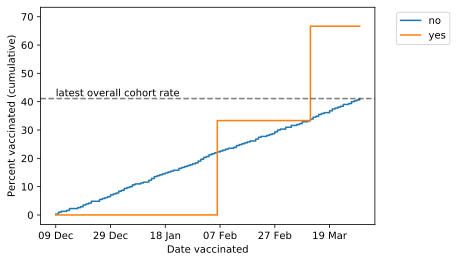

### COVID vaccinations among 65-69 population
 ### by Current COPD

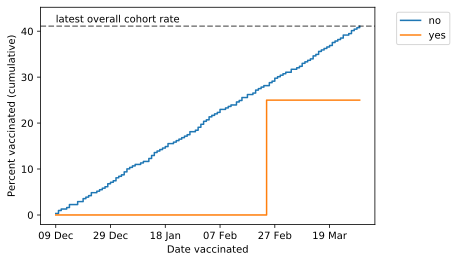

### COVID vaccinations among 65-69 population
 ### by Dementia

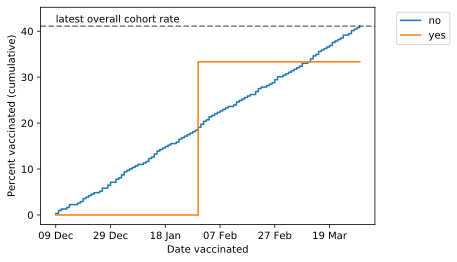

### COVID vaccinations among 65-69 population
 ### by Learning disability

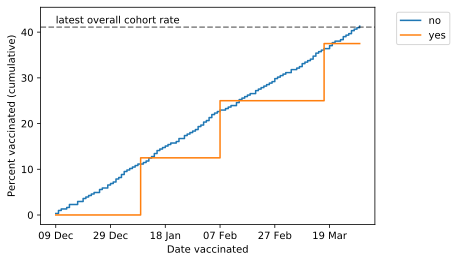

### COVID vaccinations among 65-69 population
 ### by Psychosis, schizophrenia, or bipolar

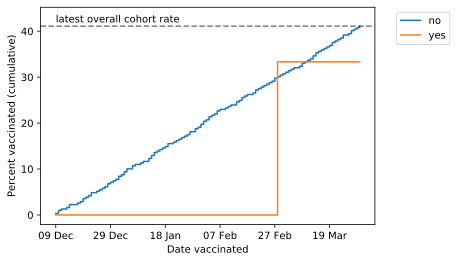

### COVID vaccinations among 65-69 population
 ### by SSRI (last 12 months)

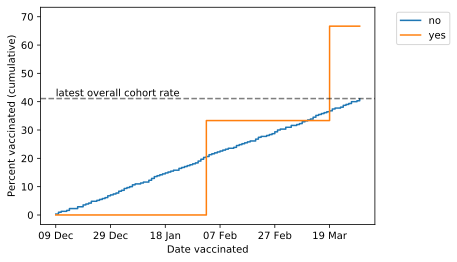

### COVID vaccinations among 65-69 population
 ### by 2nd dose

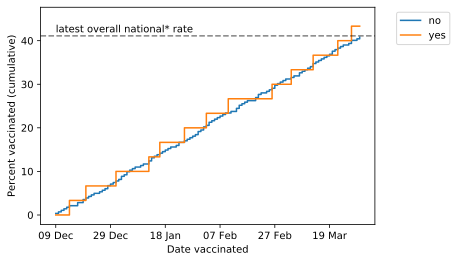

In [7]:
    
display(Markdown("## 65-69 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="65-69",
                                        files_to_exclude=["Cumulative vaccination figures.svg"])
    
for item in chartlist2:
    show_chart(item)    

## 
## Trends in vaccination rates of 60-64 population according to demographic/clinical features, cumulatively by day. <a name='charts60' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 60-64 population

### COVID vaccinations among 60-64 population
 ### by Sex

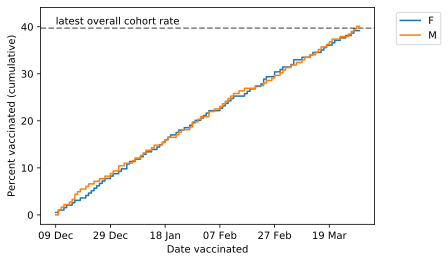

### COVID vaccinations among 60-64 population
 ### by Ethnicity (broad categories)

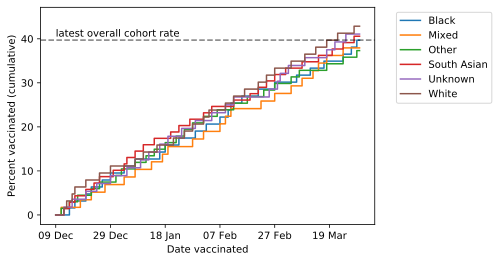

### COVID vaccinations among 60-64 population
 ### by Index of Multiple Deprivation (quintiles)

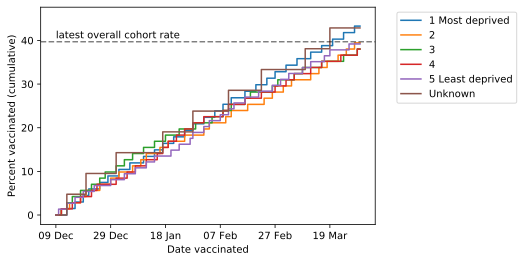

### COVID vaccinations among 60-64 population
 ### by BMI

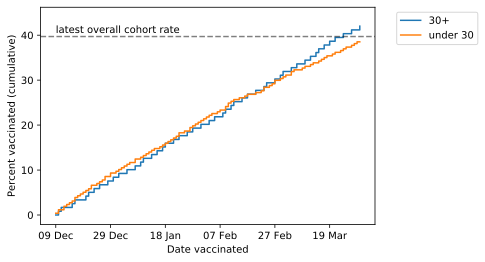

### COVID vaccinations among 60-64 population
 ### by Chronic cardiac disease

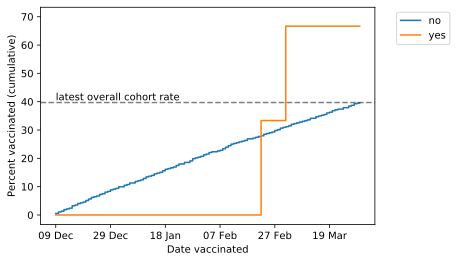

### COVID vaccinations among 60-64 population
 ### by Current COPD

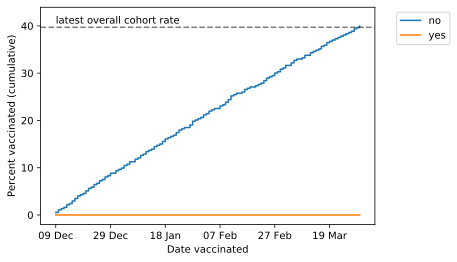

### COVID vaccinations among 60-64 population
 ### by Dementia

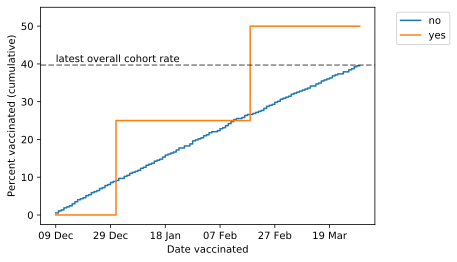

### COVID vaccinations among 60-64 population
 ### by Psychosis, schizophrenia, or bipolar

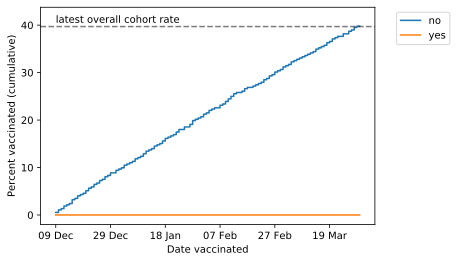

### COVID vaccinations among 60-64 population
 ### by SSRI (last 12 months)

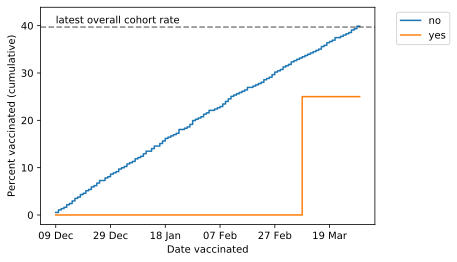

### COVID vaccinations among 60-64 population
 ### by 2nd dose

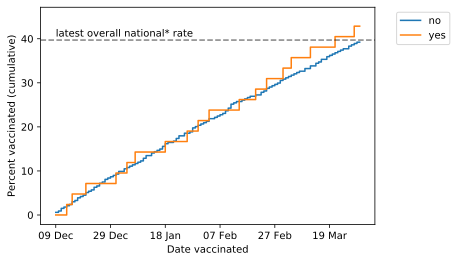

In [8]:
display(Markdown("## 60-64 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="60-64",
                                        files_to_exclude=["Cumulative vaccination figures.svg"])
    
for item in chartlist2:
    show_chart(item)    

## 
## Trends in vaccination rates of 55-59 population according to demographic/clinical features, cumulatively by day. <a name='charts55' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 55-59 population

### COVID vaccinations among 55-59 population
 ### by Sex

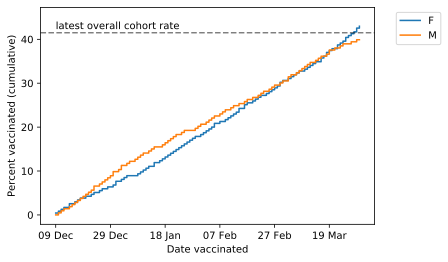

### COVID vaccinations among 55-59 population
 ### by Ethnicity (broad categories)

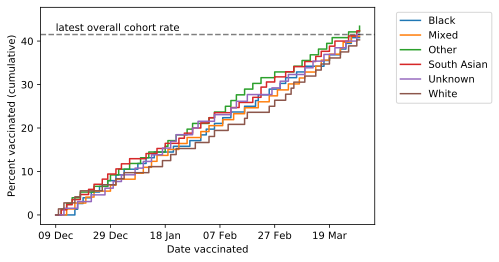

### COVID vaccinations among 55-59 population
 ### by Index of Multiple Deprivation (quintiles)

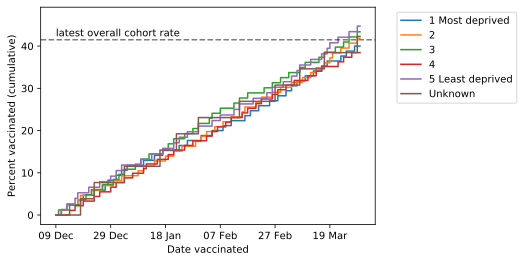

### COVID vaccinations among 55-59 population
 ### by BMI

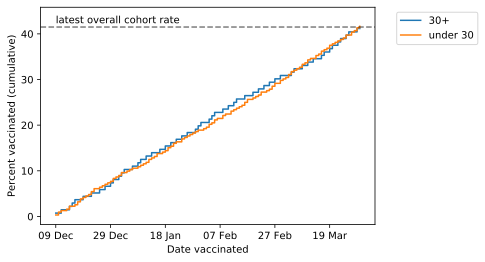

### COVID vaccinations among 55-59 population
 ### by Chronic cardiac disease

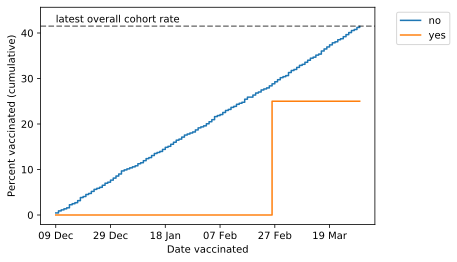

### COVID vaccinations among 55-59 population
 ### by Current COPD

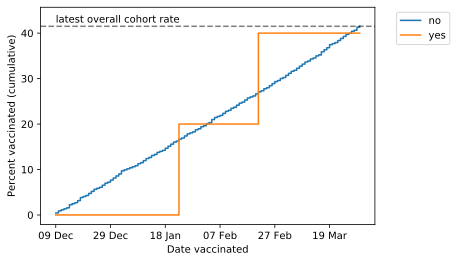

### COVID vaccinations among 55-59 population
 ### by Psychosis, schizophrenia, or bipolar

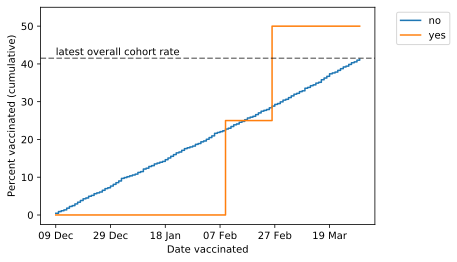

### COVID vaccinations among 55-59 population
 ### by SSRI (last 12 months)

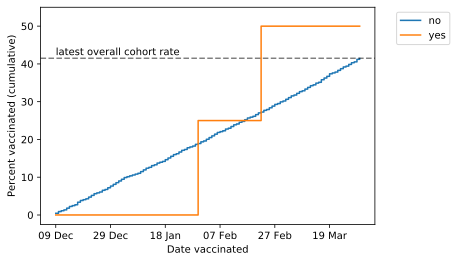

In [9]:
display(Markdown("## 55-59 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="55-59",
                                        files_to_exclude=["Cumulative vaccination figures.svg"])
    
for item in chartlist2:
    show_chart(item)    

# 
## Vaccination rates of each eligible population group, according to demographic/clinical features  <a name='tables' />

In [10]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                            pre_string="among ", tail_string=" population.csv",
                            population_subset="",
                            files_to_exclude=[])
    
for filename in tablelist:
    show_table(filename, latest_date_fmt, show_carehomes=True, suffix=suffix)

## 
 ## Cumulative vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Vaccinated at 30 Mar (n)  \
Category                                  Group                                                           
overall                                   overall                                                   851   
Sex                                       F                                                         455   
                                          M                                                         399   
Age band                                  0                                                          56   
                                          0-15                                                       56   
                                          16-29                                                      56   
                                          30-34                                                      49   
                                          35-39                                                      35   
                                          40-44                                                      42   
                                          45-49                                                      56   
                                          50-54                                                      56   
                                          55-59                                                      49   
                                          60-64                                                      49   
                                          65-69                                                      70   
                                          70-74                                                      63   
                                          75-79                                                      56   
                                          80-84                                                      56   
                                          85-89                                                      49   
                                          90+                                                        63   
Ethnicity (broad categories)              Black                                                     140   
                                          Mixed                                                     140   
                                          Other                                                     140   
                                          South Asian                                               161   
                                          Unknown                                                   119   
                                          White                                                     147   
ethnicity 16 groups                        African                                                   56   
                                           Bangladeshi or British Bangladeshi                        42   
                                           Caribbean                                                 42   
                                           Chinese                                                   42   
                                           Other                                                     49   
                                           Other Asian                                               49   
                                          British or Mixed British                                   49   
                                          Indian or British Indian                                   49   
                                          Irish                                                      35   
                                          Other Black                                                56   
                                          Other White                                                56   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Vaccinated at 30 Mar (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1411   
Sex                                       F                                                         714   
                                          M                                                         693   
Age band                                  0                                                          84   
                                          0-15                                                       91   
                                          16-29                                                      77   
                                          30-34                                                      91   
                                          35-39                                                      84   
                                          40-44                                                     105   
                                          45-49                                                      70   
                                          50-54                                                      98   
                                          55-59                                                      84   
                                          60-64                                                      91   
                                          65-69                                                      91   
                                          70-74                                                      84   
                                          75-79                                                      91   
                                          80-84                                                      84   
                                          85-89                                                      98   
                                          90+                                                        77   
Ethnicity (broad categories)              Black                                                     224   
                                          Mixed                                                     231   
                                          Other                                                     245   
                                          South Asian                                               252   
                                          Unknown                                                   217   
                                          White                                                     245   
ethnicity 16 groups                        African                                                   63   
                                           Bangladeshi or British Bangladeshi                        70   
                                           Caribbean                                                 77   
                                           Chinese                                                   70   
                                           Other                                                     77   
                                           Other Asian                                               77   
                                          British or Mixed British                                   91   
                                          Indian or British Indian                                   84   
                                          Irish                                                      70   
                                          Other Black                                                63   
                                          Other White                                                84   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among care home population 
 Please refer to footnotes below table for information.

Vaccinated at 30 Mar (n)  \
Category                     Group                                   
overall                      overall                           549   
Sex                          F                                 266   
                             M                                 280   
Age band                     0                                  42   
                             0-15                               28   
                             16-29                              42   
                             30-34                              28   
                             35-39                              42   
                             40-44                              21   
                             45-49                              35   
                             50-54                              35   
                             55-59                              42   
                             60-64                              49   
                             65-69                              21   
                             70-74                              28   
                             75-79                              42   
                             80-84                              35   
                             85-89                              21   
                             90+                                35   
Ethnicity (broad categories) Black                              91   
                             Mixed                              98   
                             Other                              84   
                             South Asian                        91   
                             Unknown                            84   
                             White                              98   
Dementia                     no                                539   
                             yes                                 7   

                                          Vaccinated at 30 Mar (%)  \
Category                     Group                                   
overall                      overall                          40.0   
Sex                          F                                37.6   
                             M                                42.1   
Age band                     0                                46.2   
                             0-15                             36.4   
                             16-29                            50.0   
                             30-34                            36.4   
                             35-39                            42.9   
                             40-44                            27.3   
                             45-49                            41.7   
                             50-54                            41.7   
                             55-59                            46.2   
                             60-64                            50.0   
                             65-69                            25.0   
                             70-74                            30.8   
                             75-79                            46.2   
                             80-84                            41.7   
                             85-89                            27.3   
                             90+                              41.7   
Ethnicity (broad categories) Black                            38.2   
                             Mixed                            38.9   
                             Other                            38.7   
                             South Asian                      40.6   
                             Unknown                          40.0   
                             White                            42.4   
Dementia                     no                               39.9   
                             yes                   

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Vaccinated at 30 Mar (n)  \
Category                                  Group                                        
overall                                   overall                                153   
newly shielded since feb 15               no                                     154   
                                          yes                                      0   
Sex                                       F                                       77   
                                          M                                       77   
Age band                                  16-29                                   21   
                                          30-39                                   21   
                                          40-49                                   21   
                                          50-59                                   14   
                                          60-69                                   21   
                                          70-79                                   35   
                                          80+                                     21   
Ethnicity (broad categories)              Black                                   21   
                                          Mixed                                   35   
                                          Other                                   28   
                                          South Asian                             28   
                                          Unknown                                 21   
                                          White                                   21   
Index of Multiple Deprivation (quintiles) 1 Most deprived                         28   
                                          2                                       28   
                                          3                                       28   
                                          4                                       35   
                                          5 Least deprived                        28   
                                          Unknown                                  7   
Learning disability                       no                                     147   
                                          yes                                      0   

                                                            Vaccinated at 30 Mar (%)  \
Category                                  Group                                        
overall                                   overall                               37.0   
newly shielded since feb 15               no                                    37.9   
                                          yes                                    NaN   
Sex                                       F                                     36.7   
                                          M                                     37.9   
Age band                                  16-29                                 37.5   
                                          30-39                                 50.0   
                                          40-49                                 37.5   
                                          50-59                                 28.6   
                                          60-69                                 42.9   
                                          70-79                                 35.7   
                                          80+                                   37.5   
Ethnicity (broad categories)              Black                                 33.3   
                                          Mixed                                 45.5   
                                          Other                                 36.4   
                                          South Asian                           44.4   
           

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Vaccinated at 30 Mar (n)  \
Category                                  Group                                                           
overall                                   overall                                                   900   
Sex                                       F                                                         476   
                                          M                                                         427   
Ethnicity (broad categories)              Black                                                     154   
                                          Mixed                                                     154   
                                          Other                                                     140   
                                          South Asian                                               147   
                                          Unknown                                                   126   
                                          White                                                     168   
ethnicity 16 groups                        African                                                   42   
                                           Bangladeshi or British Bangladeshi                        49   
                                           Caribbean                                                 42   
                                           Chinese                                                   49   
                                           Other                                                     42   
                                           Other Asian                                               49   
                                          British or Mixed British                                   42   
                                          Indian or British Indian                                   49   
                                          Irish                                                      56   
                                          Other Black                                                56   
                                          Other White                                                56   
                                          Other mixed                                                42   
                                          Pakistani or British Pakistani                             42   
                                          Unknown                                                   140   
                                          White + Asian                                              63   
                                          White + Black African                                      42   
                                          White + Black Caribbean                                    42   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           182   
                                          2                                                         161   
                                          3                                                         168   
                                          4                                                         175   
                                          5 Least deprived                                          175   
                                          Unknown                                                    42   
BMI                                       30+                                                       280   
                                          under 30                                                  623   
Chronic cardiac disease                   no                                                        889   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among LD (aged 16-64) population 
 Please refer to footnotes below table for information.

Vaccinated at 30 Mar (n)  \
Category                     Group                                   
overall                      overall                           324   
Sex                          F                                 154   
                             M                                 168   
Age band                     0                                  21   
                             0-15                               14   
                             16-29                              21   
                             30-34                              21   
                             35-39                              21   
                             40-44                              21   
                             45-49                              21   
                             50-54                              21   
                             55-59                              14   
                             60-64                              21   
                             65-69                              14   
                             70-74                              21   
                             75-79                              21   
                             80-84                              21   
                             85-89                              28   
                             90+                                28   
Ethnicity (broad categories) Black                              49   
                             Mixed                              35   
                             Other                              63   
                             South Asian                        63   
                             Unknown                            49   
                             White                              70   

                                          Vaccinated at 30 Mar (%)  \
Category                     Group                                   
overall                      overall                          41.3   
Sex                          F                                39.3   
                             M                                42.1   
Age band                     0                                42.9   
                             0-15                             33.3   
                             16-29                            37.5   
                             30-34                            50.0   
                             35-39                            50.0   
                             40-44                            42.9   
                             45-49                            42.9   
                             50-54                            37.5   
                             55-59                            28.6   
                             60-64                            42.9   
                             65-69                            33.3   
                             70-74                            42.9   
                             75-79                            42.9   
                             80-84                            42.9   
                             85-89                            44.4   
                             90+                              44.4   
Ethnicity (broad categories) Black                            36.8   
                             Mixed                            27.8   
                             Other                            47.4   
                             South Asian                      47.4   
                             Unknown                          46.7   
                             White                            45.5   

                                          Total eligible  \
Category                     Group                         
overall                      overall                 784   
Sex                          F                       392   
                    

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

## 
 ## Cumulative vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Vaccinated at 30 Mar (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1044   
Sex                                       F                                                         532   
                                          M                                                         511   
Ethnicity (broad categories)              Black                                                     175   
                                          Mixed                                                     154   
                                          Other                                                     175   
                                          South Asian                                               196   
                                          Unknown                                                   161   
                                          White                                                     189   
ethnicity 16 groups                        African                                                   42   
                                           Bangladeshi or British Bangladeshi                        56   
                                           Caribbean                                                 56   
                                           Chinese                                                   56   
                                           Other                                                     56   
                                           Other Asian                                               63   
                                          British or Mixed British                                   56   
                                          Indian or British Indian                                   56   
                                          Irish                                                      49   
                                          Other Black                                                63   
                                          Other White                                                56   
                                          Other mixed                                                70   
                                          Pakistani or British Pakistani                             56   
                                          Unknown                                                   140   
                                          White + Asian                                              63   
                                          White + Black African                                      56   
                                          White + Black Caribbean                                    63   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           203   
                                          2                                                         196   
                                          3                                                         189   
                                          4                                                         189   
                                          5 Least deprived                                          203   
                                          Unknown                                                    63   
BMI                                       30+                                                       350   
                                          under 30                                                  693   
Chronic cardiac disease                   no                                                       1029   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Vaccinated at 30 Mar (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1300   
Sex                                       F                                                         707   
                                          M                                                         595   
Ethnicity (broad categories)              Black                                                     217   
                                          Mixed                                                     210   
                                          Other                                                     231   
                                          South Asian                                               252   
                                          Unknown                                                   189   
                                          White                                                     203   
ethnicity 16 groups                        African                                                   63   
                                           Bangladeshi or British Bangladeshi                        56   
                                           Caribbean                                                 77   
                                           Chinese                                                   77   
                                           Other                                                     77   
                                           Other Asian                                               77   
                                          British or Mixed British                                   56   
                                          Indian or British Indian                                   84   
                                          Irish                                                      84   
                                          Other Black                                                70   
                                          Other White                                                84   
                                          Other mixed                                                56   
                                          Pakistani or British Pakistani                             63   
                                          Unknown                                                   182   
                                          White + Asian                                              77   
                                          White + Black African                                      56   
                                          White + Black Caribbean                                    77   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           238   
                                          2                                                         252   
                                          3                                                         252   
                                          4                                                         245   
                                          5 Least deprived                                          238   
                                          Unknown                                                    77   
BMI                                       30+                                                       392   
                                          under 30                                                  910   
Chronic cardiac disease                   no                                                       1288   
                                          yes                                                         7   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among under 55s, not in other eligible groups shown population 
 Please refer to footnotes below table for information.

Vaccinated at 30 Mar (n)  \
Category                                  Group                                                           
overall                                   overall                                                 13468   
Sex                                       F                                                        6860   
                                          M                                                        6608   
Age band                                  16-29                                                    1645   
                                          30-39                                                    1687   
                                          40-49                                                    1687   
                                          50-59                                                    1750   
                                          60-69                                                    1722   
                                          70-79                                                    3402   
                                          80+                                                      1582   
Ethnicity (broad categories)              Black                                                    2310   
                                          Mixed                                                    2289   
                                          Other                                                    2268   
                                          South Asian                                              2345   
                                          Unknown                                                  1995   
                                          White                                                    2254   
ethnicity 16 groups                        African                                                  707   
                                           Bangladeshi or British Bangladeshi                       679   
                                           Caribbean                                                693   
                                           Chinese                                                  700   
                                           Other                                                    735   
                                           Other Asian                                              700   
                                          British or Mixed British                                  700   
                                          Indian or British Indian                                  707   
                                          Irish                                                     770   
                                          Other Black                                               735   
                                          Other White                                               721   
                                          Other mixed                                               686   
                                          Pakistani or British Pakistani                            777   
                                          Unknown                                                  2072   
                                          White + Asian                                             714   
                                          White + Black African                                     714   
                                          White + Black Caribbean                                   665   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          2520   
                                          2                                                        2611   
                                          3                                                        2506   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

### 
## Appendix 
### Ethnicity coverage for each eligible group <a name='ethnicity' />

In [11]:
from create_report import get_savepath
savepath = get_savepath()
tab = pd.read_csv(os.path.join(savepath["text"], "ethnicity_coverage.csv")).set_index("group")
display(Markdown("- Ethnicity information is primarily retrieved from GP records. \
                 \n- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present. \
                 \n - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity \
                 \n recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).\
                 \n- Patient counts are rounded to the nearest 7"))

tab[["total population (n)","ethnicity coverage (%)"]].drop("vaccinated under 55s, not in other eligible groups shown")

- Ethnicity information is primarily retrieved from GP records.                  
- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present.                  
 - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity                  
 recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).                 
- Patient counts are rounded to the nearest 7

,total population (n),ethnicity coverage (%)
group,,
80+,2121,85.5
70-79,3570,84.5
care home,1372,84.2
shielding (aged 16-69),413,83.1
65-69,2191,85.6
LD (aged 16-64),784,86.6
60-64,2632,85.1
55-59,3136,85.5
